<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Relationship-between-artifact-count-and-richness-score" data-toc-modified-id="Relationship-between-artifact-count-and-richness-score-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Relationship between artifact count and richness score</a></span></li><li><span><a href="#Distribution-of-artifact-counts" data-toc-modified-id="Distribution-of-artifact-counts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution of artifact counts</a></span></li><li><span><a href="#Distribution-of-richness-scores" data-toc-modified-id="Distribution-of-richness-scores-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Distribution of richness scores</a></span></li><li><span><a href="#Distributions-of-artifact-counts-by-type" data-toc-modified-id="Distributions-of-artifact-counts-by-type-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distributions of artifact counts by type</a></span></li><li><span><a href="#t-tests-on-richness-scores-by-trench" data-toc-modified-id="t-tests-on-richness-scores-by-trench-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>t-tests on richness scores by trench</a></span></li></ul></div>

# Introduction

This notebook includes visualizations and analysis for a book project by Prof. Kevin Dicus. 

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Read in data
data = pd.read_csv('ostiasusall2.csv')
data.head()

,SU,Brick,Wkd_Stone,Marble,Mortar,Plaster_Ptd,Plaster_White,Terracotta,Tesserae,Bone_Animal,...,Iron_Slag,Lead,Shell_Land,Shell_Sea,Terracotta_Fig,Votive_Bowl,Wood_Charcoal,SUM,Richness,Trench
0,su7001,0,0,0,0,7,0,0,0,0,...,1,1,0,0,0,0,0,102,1.78,7000A
1,su7002,0,1,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,83,2.16,7000A
2,su7005,2,0,0,0,12,7,0,11,56,...,0,0,2,0,0,0,1,359,2.18,7000A
3,su7018,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,116,1.78,7000A
4,su7019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,46,1.45,7000A


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 43 columns):
SU                     31 non-null object
Brick                  31 non-null int64
Wkd_Stone              31 non-null int64
Marble                 31 non-null int64
Mortar                 31 non-null int64
Plaster_Ptd            31 non-null int64
Plaster_White          31 non-null int64
Terracotta             31 non-null int64
Tesserae               31 non-null int64
Bone_Animal            31 non-null int64
Bone_Human             31 non-null int64
Bone_Worked            31 non-null int64
Amphora                31 non-null int64
Black_Gloss            31 non-null int64
Bucchero               31 non-null int64
Ceramic_Storage        31 non-null int64
Coarseware             31 non-null int64
Cookware               31 non-null int64
Fineware               31 non-null int64
Internal_Red_Slip      31 non-null int64
Lamp                   31 non-null int64
Lead_Glaze             31 non-null 

# Relationship between artifact count and richness score

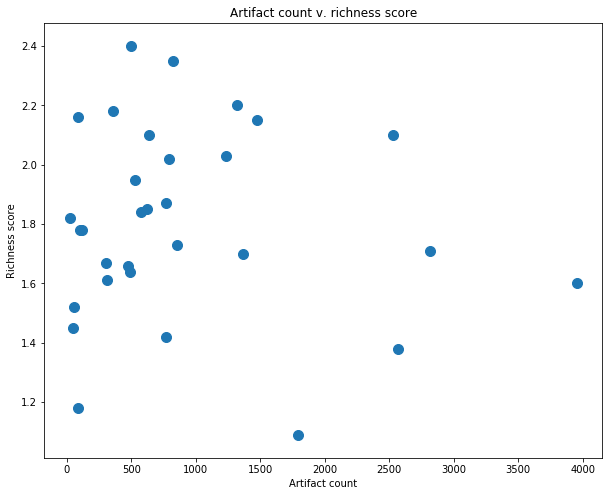

In [4]:
# Plot artifact v. richness score
plt.figure(figsize=(10,8))
plt.scatter(data.SUM, data.Richness, s=100)
plt.title('Artifact count v. richness score')
plt.xlabel('Artifact count')
plt.ylabel('Richness score')
plt.savefig('count_v_richness.png', dpi=300, padding=0.5)
plt.show();

# Distribution of artifact counts

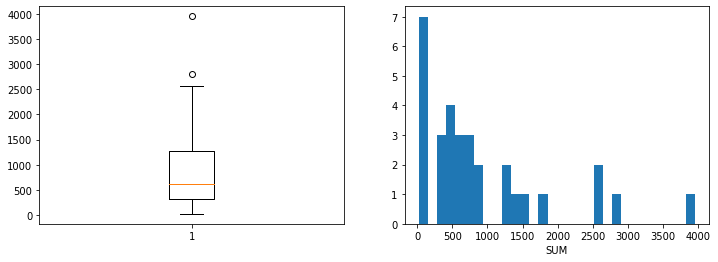

In [33]:
# View distribution of SUM values
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax1 = axes[0]
ax1.boxplot(data.SUM)
ax2.set_xlabel('SUM')

ax2 = axes[1]
ax2.hist(data.SUM, bins=30)

plt.show();

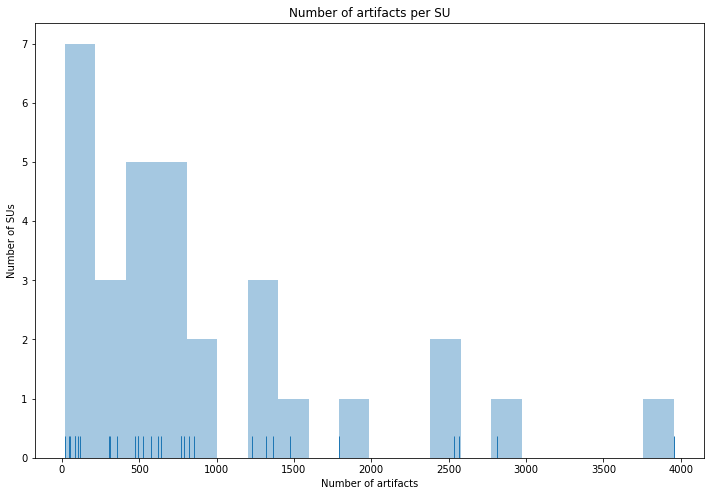

In [5]:
# Visualize artifact count per SU
plt.figure(figsize=(12,8))
sns.distplot(data.SUM, kde=False, bins=20, rug=True)
plt.title('Number of artifacts per SU')
plt.xlabel('Number of artifacts')
plt.ylabel('Number of SUs')
plt.savefig('count_per_su.png', dpi=300, padding=0.5)
plt.show();

# Distribution of richness scores

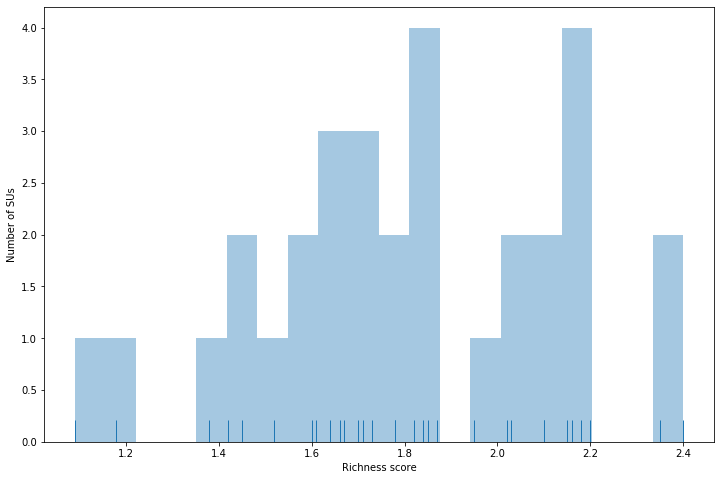

In [6]:
# Visualize artifact count per SU
plt.figure(figsize=(12,8))
sns.distplot(data.Richness, kde=False, bins=20, rug=True)
plt.xlabel('Richness score')
plt.ylabel('Number of SUs')
plt.savefig('richness_hist.png', dpi=300, padding=0.5)
plt.show();

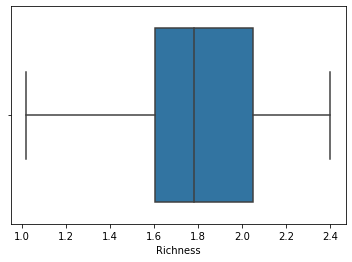

In [8]:
# View boxplot of Richness scores
sns.boxplot(data.Richness);

# Distributions of artifact counts by type

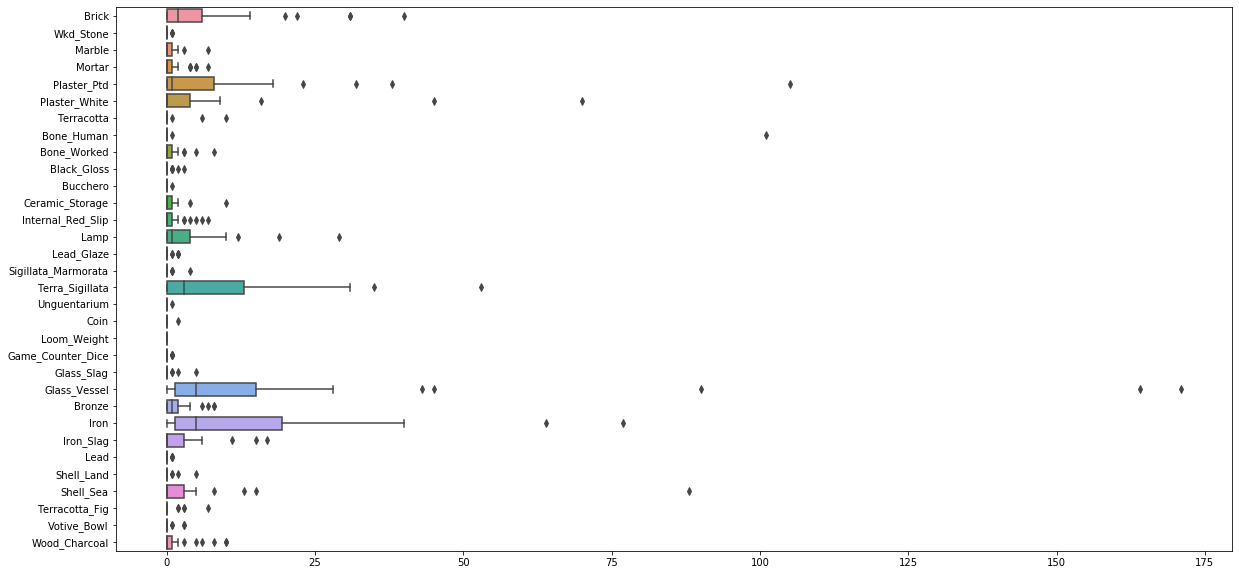

In [8]:
# Create boxplots for the features with smaller total counts
small_features = data.drop(['SU', 'SUM', 'Richness', 'Coarseware', 'Cookware', 
                            'Tesserae', 'Bone_Animal', 'Amphora', 'Fineware',
                            'Thinwall'], axis=1)

plt.figure(figsize=(20, 10))
sns.boxplot(data=small_features, orient='h')
plt.savefig('small_boxplots.png', dpi=300, pad_inches=0.5)
plt.show();

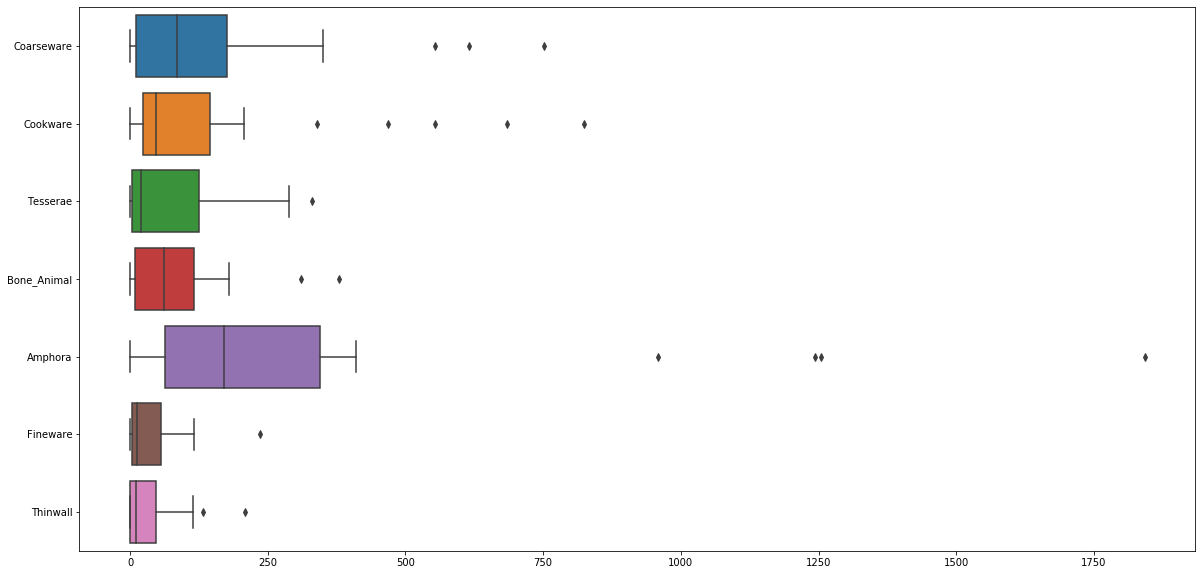

In [9]:
# Create boxplots for features with larger total counts
big_features = data.loc[:, ['Coarseware', 'Cookware', 
                            'Tesserae', 'Bone_Animal', 'Amphora', 'Fineware',
                            'Thinwall']]

plt.figure(figsize=(20, 10))
sns.boxplot(data=big_features, orient='h')
plt.savefig('big_boxplots.png', dpi=300, pad_inches=0.5)
plt.show();

# t-tests on richness scores by trench

We want to know whether the trenches come from the same underlying distribution with respect to the richness scores of their SUs. I'll test this using two-sided Welch's t-tests (because the samples are of different sizes) and an alpha value of 0.017 (0.05/3 to compensate for multiple comparisons).

In [5]:
# View counts of SUs in each trench
data.Trench.value_counts()

7000A    15
6000B     8
6000A     8
Name: Trench, dtype: int64

In [10]:
# Split the data by trench
trench_7000A = data[data.Trench == '7000A']
trench_6000A = data[data.Trench == '6000A']
trench_6000B = data[data.Trench == '6000B']

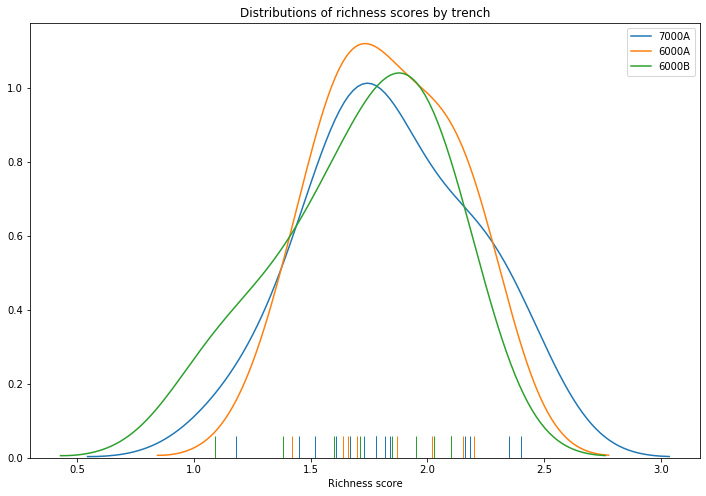

In [19]:
# Visualize distributions of richness scores by trench
plt.figure(figsize=(12,8))
sns.distplot(trench_7000A.Richness, label='7000A', hist=False, rug=True)
sns.distplot(trench_6000A.Richness, label='6000A', hist=False, rug=True)
sns.distplot(trench_6000B.Richness, label='6000B', hist=False, rug=True)
plt.xlabel('Richness score')
plt.title('Distributions of richness scores by trench')
plt.legend()
plt.show();

Our hypotheses:
- H<sub>0</sub>: there is no difference in the mean richness scores of the two trenches.
- H<sub>a</sub>: there is a difference in the mean richness scores of the two trenches.

In [23]:
# Run two-sided Welch's t-test for trench 7000A v. 6000A
from welch_functions import *

alpha = 0.017

p_value_welch_ttest(trench_7000A.Richness, trench_6000A.Richness, two_sided=True)

0.9670918925806966

In [24]:
# Run two-sided Welch's t-test for trench 7000A v. 6000B
p_value_welch_ttest(trench_7000A.Richness, trench_6000B.Richness, two_sided=True)

0.4241494977699587

In [25]:
# Run two-sided Welch's t-test for trench 6000A v. 6000B
p_value_welch_ttest(trench_6000A.Richness, trench_6000B.Richness, two_sided=True)

0.4599805126043752

In each case, the p-value is far above the alpha, and we fail to reject the null hypothesis. All three trenches come from the same underlying population in terms of richness scores.